<a href="https://colab.research.google.com/github/Annmodels/lstm/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/pdway53/Predict_Google_Stock_Price_RNN

Cloning into 'Predict_Google_Stock_Price_RNN'...
remote: Enumerating objects: 46, done.
remote: Total 46 (delta 0), reused 0 (delta 0), pack-reused 46
Unpacking objects: 100% (46/46), done.


In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 
import math 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV 
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [0]:
# Getting the real stock price for Feb 1st 2012 - Dec 31st 2016 
df_train = pd.read_csv('/content/Predict_Google_Stock_Price_RNN/Google_Stock_Price_Train.csv') 
# Getting the real stock price from Jan 1st 2017 - Feb 1st 2017 
test = pd.read_csv('/content/Predict_Google_Stock_Price_RNN/Google_Stock_Price_Test.csv') 
df_train = df_train.iloc[:,1:2].values 
price_test = test.iloc[:,1:2].values 
print('training data size : {}'.format(df_train.shape)) 
print('testing data size : {}'.format(price_test.shape))

training data size : (1258, 1)
testing data size : (21, 1)


In [0]:
def build_classifier(optimizer):     
  reg_rnn = Sequential()     
  reg_rnn.add(LSTM(units = 4, init = 'normal',return_sequences = True, input_shape = (None, 1)))     
  reg_rnn.add(LSTM(units = 4, init = 'normal',return_sequences = True))     
  reg_rnn.add(LSTM(units = 4, init = 'normal'))     
  reg_rnn.add(Dense(units = 1,init = 'normal'))     
  reg_rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')     
  return reg_rnn      
  #reg_rnn.fit(x_train, y_train, batch_size = 32, epochs = 200)           
model = KerasClassifier(build_fn = build_classifier) 
parameters = { 'batch_size': [5,20],'nb_epoch': [100,101],'optimizer': ['adam', 'rmsprop'], }  
  #tuning for the best parameter 
grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'neg_mean_absolute_error', cv = 10)  
grids = grid_search.fit(x_train, y_train) 
best_parameters = grids.best_params_ 
best_accuracy = grid_search.best_score_  
  #summarize results 
  #print(best_accuracy)
print("Best: %f using %s" % (best_accuracy, best_parameters))

In [0]:
# Scaling 
sc = MinMaxScaler(feature_range = (0, 1)) 
train_scaled = sc.fit_transform(df_train)  
 # Creating a data structure with 20 timesteps and t+1 output 
x_train = [] 
y_train = []  
for i in range(20, 1258):     
  x_train.append(train_scaled[i-20:i, 0])     
  y_train.append(train_scaled[i, 0])      
  
x_train, y_train = np.array(x_train), np.array(y_train)  
   # Reshaping 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  
   # 3-layer RNN 
reg_rnn = Sequential() 
reg_rnn.add(LSTM(units = 4, return_sequences = True, input_shape = (None, 1))) 
reg_rnn.add(LSTM(units = 4, return_sequences = True)) 
reg_rnn.add(LSTM(units = 4 )) 
reg_rnn.add(Dense(units = 1)) 
reg_rnn.compile(optimizer = 'adam', loss = 'mean_squared_error') 
reg_rnn.fit(x_train, y_train, batch_size = 5, epochs = 20)   
   # predict the stock price 
real_stock_price = np.concatenate((df_train[0:1258] ,price_test),axis = 0) 
scaled_real_stock_price = sc.fit_transform(real_stock_price) 
input_x = [] 
for i in range(1258,1279):     
  input_x.append(scaled_real_stock_price[i-20:i, 0])       
    
input_x = np.array(input_x) 
input_x = np.reshape(input_x, (input_x.shape[0], input_x.shape[1], 1) )  
predicted_price = reg_rnn.predict(input_x) 
predicted_price = sc.inverse_transform(predicted_price)   
rmse = math.sqrt(mean_squared_error(real_stock_price[1258:], predicted_price))





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





1238/1238 [==============================] - 30s 24ms/step - loss: 0.0425
Epoch 2/20
1238/1238 [==============================] - 20s 16ms/step - loss: 0.0021
Epoch 3/20
1238/1238 [==============================] - 20s 16ms/step - loss: 0.0018
Epoch 4/20
1238/1238 [==============================] - 19s 16ms/step - loss: 0.0018
Epoch 5/20
1238/1238 [==============================] - 20s 16ms/step - loss: 0.0018
Epoch 6/20
1238/1238 [==============================] - 20s 16ms/step - loss: 0.0016
Epoch 7/20
1238/1238 [==============================] - 19s 15ms/step - loss: 0.0015
Epoch 8/20
1238/1238 [==============================] - 19s 15ms/step - loss: 0.0014
Epoch 9/20
1238/1238 [==============================] - 19s 16ms/step - loss: 0.0015
Epoch 10/20
1238/1238 [==============================] - 19s 15ms/step - loss: 0.0014
Epoch 11/20
1238/1238 [====================

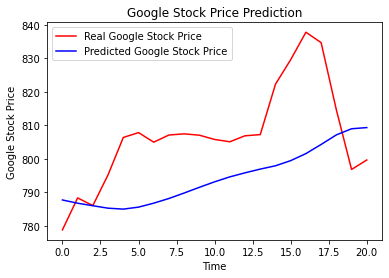

In [0]:
plt.plot(real_stock_price[1258:], color = 'red', label = 'Real Google Stock Price') 
plt.plot(predicted_price, color = 'blue', label = 'Predicted Google Stock Price') 
plt.title('Google Stock Price Prediction') 
plt.xlabel('Time') 
plt.ylabel('Google Stock Price') 
plt.legend() 
plt.show()

(1257, 1)
Epoch 1/100
1257/1257 [==============================] - 2s 2ms/step - loss: 0.2634
Epoch 2/100
1257/1257 [==============================] - 0s 159us/step - loss: 0.2251
Epoch 3/100
1257/1257 [==============================] - 0s 143us/step - loss: 0.1882
Epoch 4/100
1257/1257 [==============================] - 0s 138us/step - loss: 0.1541
Epoch 5/100
1257/1257 [==============================] - 0s 157us/step - loss: 0.1245
Epoch 6/100
1257/1257 [==============================] - 0s 151us/step - loss: 0.1017
Epoch 7/100
1257/1257 [==============================] - 0s 175us/step - loss: 0.0873
Epoch 8/100
1257/1257 [==============================] - 0s 140us/step - loss: 0.0800
Epoch 9/100
1257/1257 [==============================] - 0s 135us/step - loss: 0.0774
Epoch 10/100
1257/1257 [==============================] - 0s 144us/step - loss: 0.0767
Epoch 11/100
1257/1257 [==============================] - 0s 147us/step - loss: 0.0763
Epoch 12/100
1257/1257 [====================

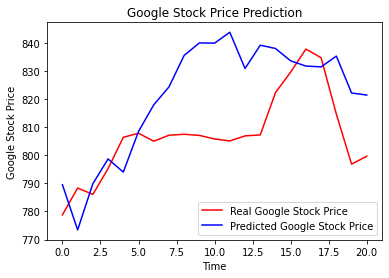

In [0]:
x_train = train_scaled[0:1257] 
print(x_train.shape) 
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)) 
y_train = train_scaled[1:1258]    
# Initialising the RNN 
reg_rnn1 = Sequential() 
reg_rnn1.add(LSTM(units = 4,  return_sequences = True, activation = 'sigmoid', input_shape = (None, 1))) 
reg_rnn1.add(LSTM(units = 4, return_sequences = True)) 
reg_rnn1.add(LSTM(units = 3)) 
reg_rnn1.add(Dense(units = 1)) 
reg_rnn1.compile(optimizer = 'adam', loss = 'mean_squared_error') 
reg_rnn1.fit(x_train, y_train, batch_size = 64, epochs = 100)  
# predicted stock price of 2017 
inputs = train_scaled[1237:1258] 
inputs = np.reshape(inputs, (21, 1, 1)) 
predictions = reg_rnn1.predict(inputs) 
predicted_stock_price = sc.inverse_transform(predictions)  
# Visualising the results 
plt.plot(price_test, color = 'red', label = 'Real Google Stock Price') 
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price') 
plt.title('Google Stock Price Prediction') 
plt.xlabel('Time') 
plt.ylabel('Google Stock Price') 
plt.legend() 
plt.show()